<center><h1>Zhang_Dezhen_HW2</h1></center>
<br>
<br>

Name: Dezhen Zhang
<br>
Github Username: Daisyz123
<br>
USC ID: 9545584385

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

Get the Cycle Power Plant Data Set

In [7]:
#load data into jupyter notebook
get_power_plant_data = "../data/CCPP/Folds5x2_pp.xlsx"
data = pd.read_excel(get_power_plant_data)

### (b) Exploring the data

#### i. rows and columns

In [8]:
print(data)
print("There are", data.shape[0], "rows of data points collected from a Combined Cycle Power Plant over 6 years.")
print("There are", data.shape[1], "columns consisting of 5 variables: Ambient Temperature (AT), Exhaust Vaccum (V), Ambient Pressure (AP), Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the power plant.")

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
There are 9568 rows of data points collected from a Combined Cycle Power Plant over 6 years.
There are 5 columns consisting of 5 variables: Ambient Temperature (AT), Exhaust Vaccum (V), Ambient Pressure (AP), Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the power plant.


#### ii. pairwise scatterplots of all the variables

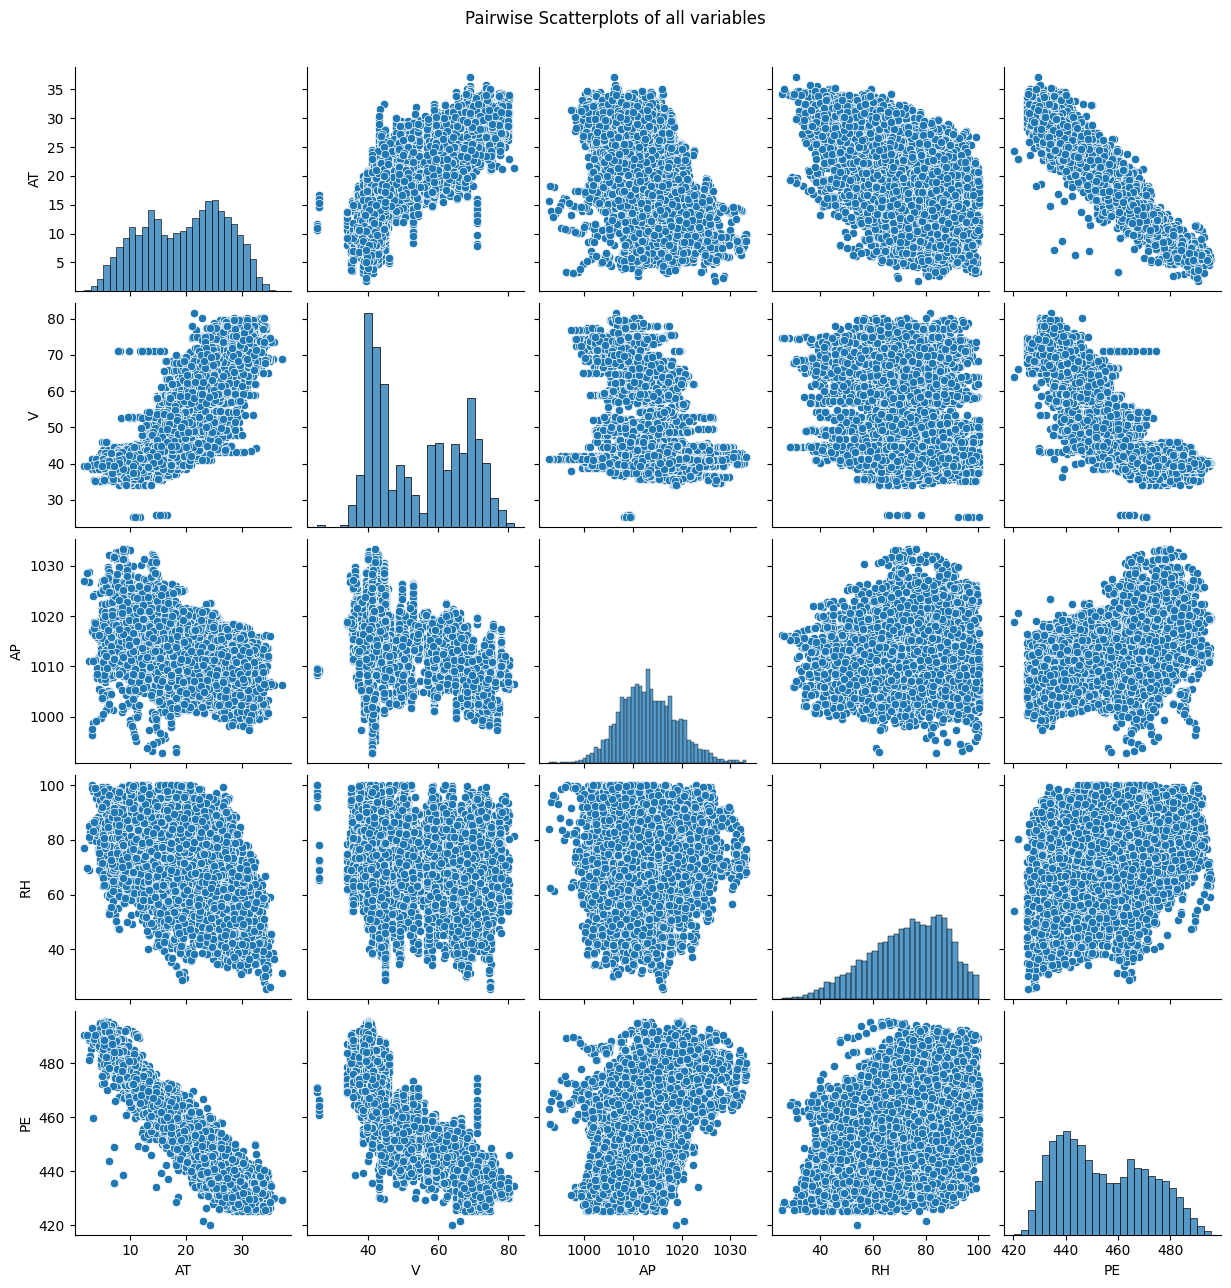

In [9]:
predictors = ["AT", "V", "AP", "RH"] #independent variables 
dep_variable = "PE"                     

sns.pairplot(data[predictors + [dep_variable]])
plt.suptitle("Pairwise Scatterplots of all variables", y=1.03)
plt.show()

From the pairwise scatterplots of all the variables, I can find that there is a linear relationship between PE and AT, and between PE and V.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [10]:
table_of_summary = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median(),
    "Range": data.max() - data.min(),
    "First Quartile": data.quantile(0.25),
    "Third Quartile": data.quantile(0.75),
    "Interquartile Ranges": data.quantile(0.75) - data.quantile(0.25)
})

print(table_of_summary)

           Mean    Median  Range  First Quartile  Third Quartile  \
AT    19.651231    20.345  35.30         13.5100           25.72   
V     54.305804    52.080  56.20         41.7400           66.54   
AP  1013.259078  1012.940  40.41       1009.1000         1017.26   
RH    73.308978    74.975  74.60         63.3275           84.83   
PE   454.365009   451.550  75.50        439.7500          468.43   

    Interquartile Ranges  
AT               12.2100  
V                24.8000  
AP                8.1600  
RH               21.5025  
PE               28.6800  


### (c) Simple Linear Regression


Linear Regression For: PE ~ AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:30:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.034

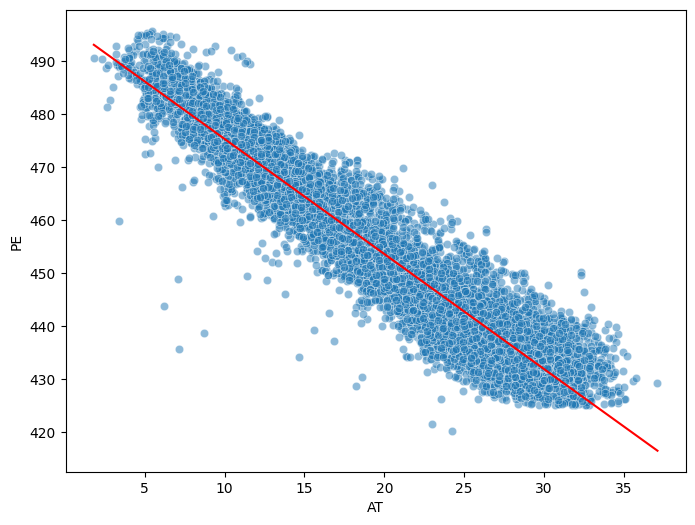

There are 9 outliers detected and can be removed from the data for better regression.

Linear Regression For: PE ~ V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:30:44   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

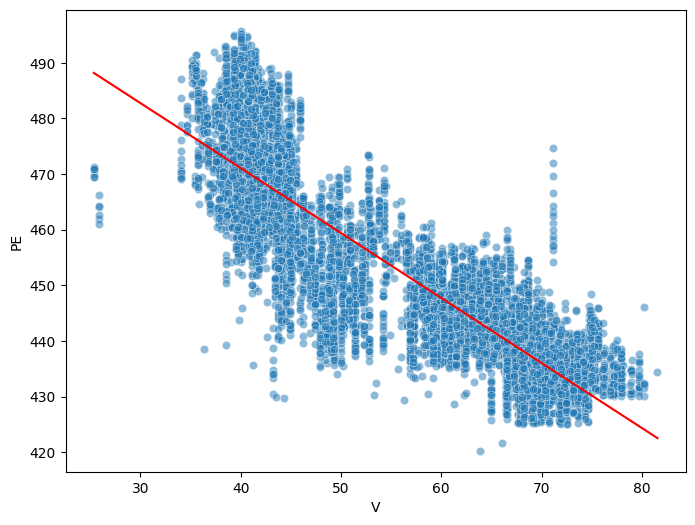

There are 1 outliers detected and can be removed from the data for better regression.

Linear Regression For: PE ~ AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:30:53   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

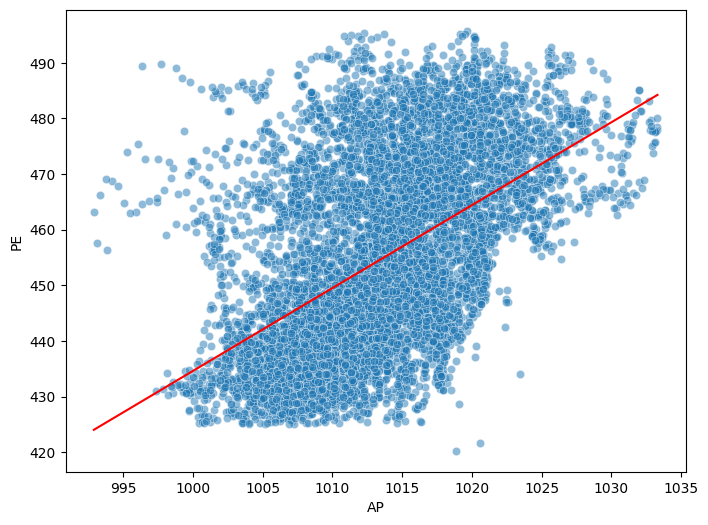

No significant outliers found by the outlier test.

Linear Regression For: PE ~ RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:31:09   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

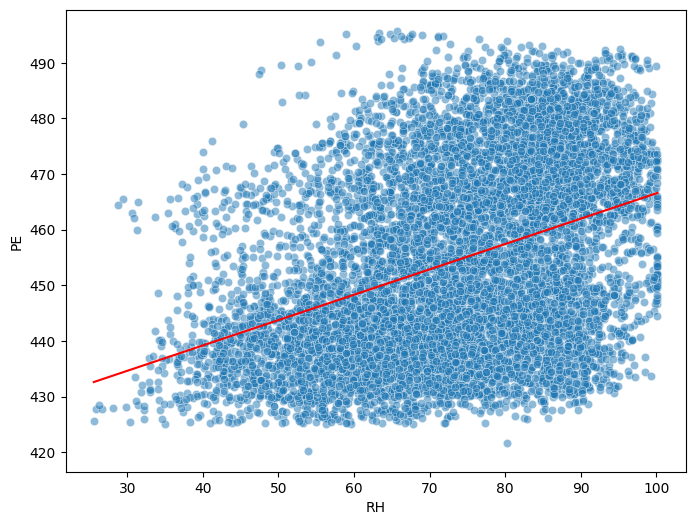

No significant outliers found by the outlier test.


In [11]:
predictors = ["AT", "V", "AP", "RH"] #independent variables 
dep_variable = "PE"  

for predictor in predictors:
    formula = f"{dep_variable} ~ {predictor}"
    model = smf.ols(formula=formula, data=data).fit()
    print(f"\nLinear Regression For: {dep_variable} ~ {predictor}")
    print(model.summary())
    
    # find outliers
    outlier = model.outlier_test(method='bonf', alpha=0.05)
    sig_mask = outlier['bonf(p)'] < 0.05
    outliers_list = outlier[sig_mask]

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data[predictor], y=data[dep_variable], alpha=0.5)
    sns.lineplot(x=data[predictor], y=model.fittedvalues, color="red")
    plt.xlabel(predictor)
    plt.ylabel(dep_variable)
    plt.show()
    
    if outliers_list.empty:
        print("No significant outliers found by the outlier test.")
    else:
        print(f"There are {len(outliers_list)} outliers detected and can be removed from the data for better regression.")


By comparing the R^2 from each predictor with PE, the predictors AT and V show a relatively strong relationship with high R^2 values. However, comparing the p-values, each predictor shows a significant effect on the dependent PE variable, with all 0.00 p-values given from the linear regression. Plotting all of the linear regressions, the plot of the AT vs PE, and V vs PE looks more fit to the regression with fewer points scattered; the PE vs AP, and PE vs RH show more scatter in fitting the regression. By running the outlier test, I would like to remove 9 outliers from AT, 1 outlier from the V,  and no outliers need to be removed for RH and AP.

### (d) Multiple Regression

In [12]:
predictors = ["AT", "V", "AP", "RH"] #independent variables 
dep_variable = "PE"  
# multiple regression
formula = f"{dep_variable} ~ {' + '.join(predictors)}"
multi_model = smf.ols(formula=formula, data=data).fit()
print(f"\nMultiple Regression For: {dep_variable} ~ {' + '.join(predictors)}")
print(multi_model.summary())


Multiple Regression For: PE ~ AT + V + AP + RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:31:28   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

From the multiple regression, we can see that all p-values are smaller than alpha, so all predictors reject the null hypothesis (beta0 = 0) and conclude there is significance.

### (e) 1c Compare to 1d

  predictor  x_axis (simple regression)  y_axis (multiple regression)
0        AT                   -2.171320                     -1.977513
1         V                   -1.168135                     -0.233916
2        AP                    1.489872                      0.062083
3        RH                    0.455650                     -0.158054


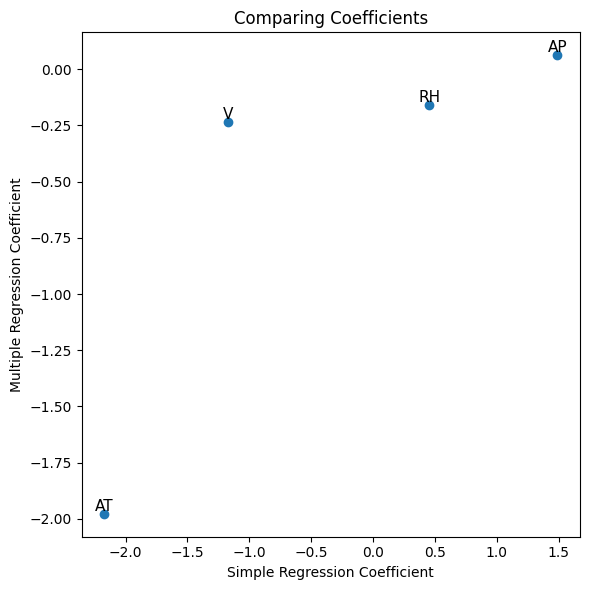

In [15]:
predictors = ["AT", "V", "AP", "RH"]   # independent variables
dep_variable = "PE"                    

predictors_names, x, y = [], [], []   # create list for predictor names, simple coefs (x), multiple coefs (y)

# get the linear regression predictor's coefficient for the x-axis
for predictor in predictors:
    formula = f"{dep_variable} ~ {predictor}"
    model = smf.ols(formula=formula, data=data).fit()
    predictors_names.append(predictor)
    x.append(model.params[predictor])

# get the multiple regression predictors' coefficient for the y-axis
formula = f"{dep_variable} ~ {' + '.join(predictors)}"
multi_model = smf.ols(formula=formula, data=data).fit()
for predictor in predictors:
    y.append(multi_model.params[predictor])

# check the x,y table
coefficient_df = pd.DataFrame({"predictor": predictors_names, "x_axis (simple regression)": x, "y_axis (multiple regression)": y})
print(coefficient_df)

# plot the x,y
plt.figure(figsize=(6,6))
plt.scatter(x = coefficient_df["x_axis (simple regression)"],
            y = coefficient_df["y_axis (multiple regression)"])
for coefficient, row in coefficient_df.iterrows():
    plt.text(row["x_axis (simple regression)"],
             row["y_axis (multiple regression)"],
             row["predictor"],
             fontsize=11, ha='center', va='bottom')
plt.xlabel("Simple Regression Coefficient")
plt.ylabel("Multiple Regression Coefficient")
plt.title("Comparing Coefficients")
plt.tight_layout()
plt.show()

According to the plot, the coefficient values differ between linear regression and multiple regression, and show that not all the predictors are independent, and they are also correlated with each other to different degrees. In linear regression, the coefficient only measures the marginal association between one predictor and the dependent variable PE, and in multiple regression, each coefficients measure the conditional association of each predictor with PE. Besides, the predictor V shows the biggest difference, which means it has been inflated by correlation with other predictors.

### (f) Nonlinear Association

In [ ]:
predictors = ["AT", "V", "AP", "RH"]   # independent variables
dep_variable = "PE"  

for predictor in predictors:
    formula = f"{dep_variable} ~ {predictor} + I({predictor}**2) + I({predictor}**3)"
    model = smf.ols(formula=formula, data=data).fit()
    
    print(f"\nPolynomial Regression for {predictor}:")
    print(model.summary().tables[1])  

Applying the polynomial regression for each predictor, AT, AP, and RH all show a nonlinear association because all the X^2 and X^3 are smaller than alpha, which rejects the null hypothesis of beta=0. For predictor V, only the X^3 shows a nonlinear association because the p-value of X^2 is greater than alpha, so we accept the null hypothesis that there is no nonlinear association in X^2 for predictor V.

### (g) Interactions of Predictors

In [ ]:
predictors = ["AT", "V", "AP", "RH"]
dep_variable = "PE"

# for all 2-way interactions
two_way_interaction = f"{dep_variable} ~ ({' + '.join(predictors)})**2"
stat_interaction = smf.ols(formula=two_way_interaction, data=data).fit()
print(stat_interaction.summary().tables[1])


After running the full linear regression with all pairwise interactions, there is evidence of an association of interaction of predictors based on the p-values. Comparing the p-values with alpha of 0.05, we can say that out of the 6 interactions (AT:V, AT:AP, AT:RH, V:AP, V:RH, and AP:RH), only AT:AP and V:RH have a greater p-value than the alpha. For the remaining four interactions, they are statistically significant.

### (h) Improvement

In [35]:
# splitting testing and training model
X = data.drop(columns=["PE"])   # X for all predictors 
y = data["PE"]                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=3
)

# add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)

# fit linear regression PE ~ AT + V + AP + RH with sm
model_sm = sm.OLS(y_train, X_train_sm).fit()

# predictions
y_train_pred = model_sm.predict(X_train_sm)
y_test_pred  = model_sm.predict(X_test_sm)

# MSE
mse_train_sm = mean_squared_error(y_train, y_train_pred)
mse_test_sm  = mean_squared_error(y_test,  y_test_pred)

# model 2 nonlinear multiple regression with smf
train = pd.concat([X_train, y_train], axis=1)
test  = pd.concat([X_test, y_test], axis=1)

formula_interaction = """
PE ~ AT + V + AP + RH
   + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH
   + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)
"""
model_full = smf.ols(formula=formula_interaction, data=train).fit()
print(model_full.summary())
print("Check coefficient's p-value with alpha of 0.05, I took off V, AT:AP, V:AP, V:RH, and V^2 from the formula")
formula_adjusted = """
PE ~ AT + V + AP + RH
   + AT:V + AT:RH + AP:RH
   + I(AT**2) + I(AP**2) + I(RH**2)
"""
model_adjusted = smf.ols(formula=formula_adjusted, data=train).fit()

# make predictions and get MSE
y_train_nonlinear = model_adjusted.predict(train)
y_test_nonlinear  = model_adjusted.predict(test)

mse_train_nonlinear = mean_squared_error(y_train, y_train_nonlinear)
mse_test_nonlinear  = mean_squared_error(y_test,  y_test_nonlinear)

# comparing test and train MSE
print(f"MSE for linear model: train={mse_train_sm:.3f}, test={mse_test_sm:.3f}")
print(f"MSE for nonlinear model: train={mse_train_nonlinear:.3f}, test={mse_test_nonlinear:.3f}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7206.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:16:27   Log-Likelihood:                -19192.
No. Observations:                6697   AIC:                         3.841e+04
Df Residuals:                    6682   BIC:                         3.852e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8158.4109   1418.421     -5.752      0.0

MSE for the linear model: train data is 20.851 and test data is 20.590;  MSE for the nonlinear model: train data is 18.101 and test data is 18.295. I think the improved model performs better with a smaller MSE than the linear model.

### (i) KNN

For raw: best k is 5,  test MSE = 15.70, train MSE = 10.55
for normalized: best k is 4, test MSE = 14.07, train MSE = 8.74


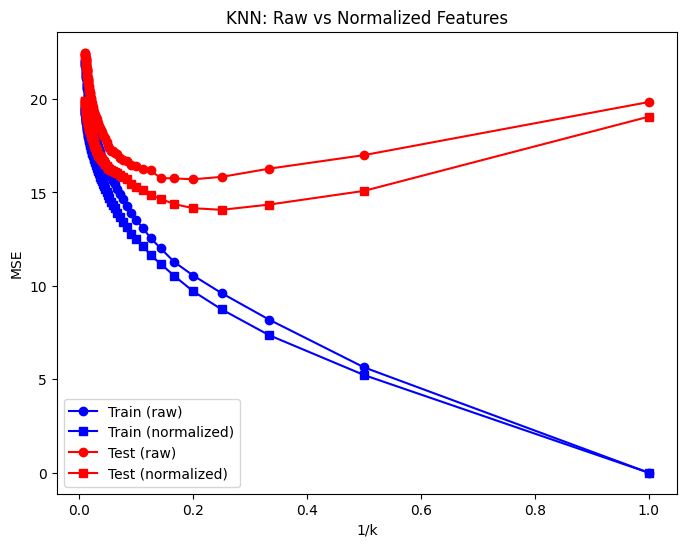

In [45]:
# splitting testing and training model
X = data.drop(columns=["PE"])   # X for all predictors 
y = data["PE"]                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=1
)
train_data = pd.concat([X_train, y_train], axis=1)
test_data  = pd.concat([X_test,  y_test],  axis=1)

# set k value
k_value = range(1, 101)
k_inverse = [1/k for k in k_value]

# MSE for raw and normalized features 
train_mse_raw,  test_mse_raw  = [], []
train_mse_norm, test_mse_norm = [], []

for k in k_value:
    # raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    train_mse_raw.append(mean_squared_error(y_train, knn_raw.predict(X_train)))
    test_mse_raw.append(mean_squared_error(y_test,  knn_raw.predict(X_test)))

    # normalize features
    knn_norm = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    knn_norm.fit(X_train, y_train)
    train_mse_norm.append(mean_squared_error(y_train, knn_norm.predict(X_train)))
    test_mse_norm.append(mean_squared_error(y_test,  knn_norm.predict(X_test)))

find_best_k_raw  = k_value[int(np.argmin(test_mse_raw))]
find_best_k_norm = k_value[int(np.argmin(test_mse_norm))]

print(f"For raw: best k is {find_best_k_raw},  test MSE = {min(test_mse_raw):.2f}, "
      f"train MSE = {train_mse_raw[find_best_k_raw-1]:.2f}")
print(f"for normalized: best k is {find_best_k_norm}, test MSE = {min(test_mse_norm):.2f}, "
      f"train MSE = {train_mse_norm[find_best_k_norm-1]:.2f}")

# plots MSE 
plt.figure(figsize=(8,6))
plt.plot(k_inverse, train_mse_raw,  color="blue", marker="o", label="Train (raw)")
plt.plot(k_inverse, train_mse_norm, color="blue", marker="s", label="Train (normalized)")
plt.plot(k_inverse, test_mse_raw,   color="red",  marker="o", label="Test (raw)")
plt.plot(k_inverse, test_mse_norm,  color="red",  marker="s", label="Test (normalized)")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.title("KNN: Raw vs Normalized Features")
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [44]:
print("For raw features: best k is 5 with test MSE = 15.70 and train MSE = 10.55. For normalized features: best k is 4 with test MSE = 14.07 and train MSE = 8.74")
print("MSE for the linear model: train data is 20.851 and test data is 20.590")
print("The KNN with normalized feature has the smallest test and train MSE. The noramlized KNN shows lower test errors and indicating better performamce on this dataset")

For raw features: best k is 5 with test MSE = 15.70 and train MSE = 10.55. For normalized features: best k is 4 with test MSE = 14.07 and train MSE = 8.74
MSE for the linear model: train data is 20.851 and test data is 20.590
The KNN with normalized feature has the smallest test and train MSE. The noramlized KNN shows lower test errors and indicating better performamce on this dataset


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

We should expect a better performance for the flexible learning method than the inflexible method. With an extremely large sample size and a small number of predictors, the flexible method can better capture the complex structures/patterns without just applying a simple regression, like linear regression (an inflexible method), which may be too restrictive and miss important nonlinearities or interactions. Because of this, flexible methods are more likely to achieve lower MSE and provide more accurate predictions.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

We should expect a worse performance for the flexible learning method than the inflexible method. With extremely large p and small n, flexible methods tend to overfit the data and have high variance because there isn’t enough data to constrain the regression. So an inflexible method will perform better with lower variance.

### (c) The relationship between the predictors and response is highly non-linear.

We should expect a better performance for the flexible learning method than the inflexible method. Inflexible methods are hard to capture complex interactions to better present the relationship between predictors and response. So the flexible method will be better at catching the complex interactions to better fit the data.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

We should expect a worse performance for the flexible learning method than the inflexible method. An inflexible method like linear regression will have a small variance and sometimes have a lower test error.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [ ]:
# import training table
data = pd.DataFrame({
    "Obs": [1, 2, 3, 4, 5, 6], "X1":  [0, 2, 0, 0, -1, 1], 
    "X2":  [3, 0, 1, 1, 0, 1], "X3":  [0, 0, 3, 2, 1, 1], 
    "Y":   ["Red", "Red", "Red", "Green", "Green", "Red"]
})

# test point 
x_test = np.array([0, 0, 0])

# Euclidean distance between obs and test point
data["Euclidean_distance"] = np.linalg.norm(data[["X1","X2","X3"]].to_numpy() - x_test, axis=1)
print(data[["Obs","X1","X2","X3","Y","Euclidean_distance"]])

### (b) What is our prediction with K = 1? Why?

In [ ]:
# K = 1 prediction
pred_k1 = data.nsmallest(1, "Euclidean_distance")
pred_color = pred_k1["Y"].mode().iloc[0]
print(pred_k1[["Obs","X1","X2","X3","Y","Euclidean_distance"]])
print("K=1 prediction:", pred_color)

When K=1, we pick the single closest neighbor. The nearest to test (0,0,0) is observation 5 at (-1,0,1), labeled Green. As results, we predict the test point is Green.

### (c) What is our prediction with K = 3? Why?

In [ ]:
# K = 3 prediction
pred_k3 = data.nsmallest(3, "Euclidean_distance")
print(pred_k3[["Obs","X1","X2","X3","Y","Euclidean_distance"]])

# find the max count in color 
counts = pred_k3["Y"].value_counts()
pred_color = counts.idxmax()
print("K=3 prediction:", pred_color)

When K=3, we pick the 3 closest neighbors. The nearest to test (0,0,0) is observation 5 at (-1,0,1), observation 6 at (1,1,1), and observation 2 at (2,0,0). The color from the 3 closest neighbors is 2 counts of red and 1 count of green, so we take the most counts of red. As a result, we predict the test point is Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We would prefer a smaller K. When the Bayes decision boundary is highly non-linear, we need the classifier to be flexible to fit the complex shapes. A smaller K provides a more precise decision boundary with lower bias, and can better capture that complexity. However, there will be a tradeoff of increasing variance, and so the models are more sensitive to noise. 